# Regresiones lineales múltiples
**Centro Turing**

En esta unidad, vamos a: 
* Ampliar los procedimientos de una regresión simple a una múltiple, vigilando posibles fuentes de problemas como la multicolinealidad 
* Comprender la importancia de cada término en la ecuación del modelo lineal 
* Hacer que sus variables trabajen juntas y aumente su capacidad de predicción utilizando las interacciones entre las variables 
* Aproveche las expansiones polinómicas para aumentar el ajuste de su modelo lineal con funciones no lineales

## Uso de múltiples funciones 

Para recapitular las herramientas vistas en el capítulo anterior, recargamos todos los paquetes y el conjunto de datos de Boston:

In [130]:
import numpy as np 
import pandas as pd
import matplotlib as mpl 
from sklearn.datasets import load_boston
from sklearn import linear_model
import statsmodels.api as sm
import statsmodels.formula.api as smf
from sklearn.metrics import r2_score

In [131]:
boston = load_boston() 
dataset = pd.DataFrame(boston.data, columns=boston.feature_names)
dataset['target'] = boston.target

In [132]:
observations = len(dataset) 
variables = dataset.columns[:-1] 
X = dataset[variables]
y = dataset['target'].values

## Construcción de modelos con Statsmodels 

Como primer paso para ampliar a más predictores el análisis realizado anteriormente con Statsmodels, vamos a recargar los módulos necesarios del paquete (uno que trabaja con matrices y el otro con fórmulas):

In [133]:
"""
Preparemos también una matriz de entrada adecuada, llamándola Xc después de haberla incrementado con una columna extra que contenga el vector de sesgo 
(una variable constante que tiene el valor unitario):
"""
Xc = sm.add_constant(X) 
linear_regression = sm.OLS(y,Xc)
fitted_model = linear_regression.fit()

C:\Users\julih\OneDrive\Documentos\Repositorios\analisis-regresiones\venv\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [134]:
fitted_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.741
Model:                            OLS   Adj. R-squared:                  0.734
Method:                 Least Squares   F-statistic:                     108.1
Date:                Tue, 20 Jul 2021   Prob (F-statistic):          6.72e-135
Time:                        23:14:20   Log-Likelihood:                -1498.8
No. Observations:                 506   AIC:                             3026.
Df Residuals:                     492   BIC:                             3085.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         36.4595      5.103      7.144      0.000      26.432      46.487
CRIM          -0.1080      0.033     -3.287      0.001      -0.173      -0.043
ZN             0.0464      0.014      3.382      0.001       0.019       0.073
INDUS          0.0206      0.061      0.334      0.738      -0.100       0.141
CHAS           2.6867      0.862      3.118      0.002       0.994       4.380
NOX          -17.7666      3.820     -4.651      0.000     -25.272     -10.262
RM             3.8099      0.418      9.116      0.000       2.989       4.631
AGE            0.0007      0.013      0.052      0.958      -0.025       0.027
DIS           -1.4756      0.199     -7.398      0.000      -1.867      -1.084
RAD            0.3060      0.066      4.613      0.000       0.176       0.436
TAX           -0.0123      0.004     -3.280      0.001      -0.020      -0.005
PTRATIO       -0.9527      0.131     -7.283      0.000      -1.210      -0.696
B              0.0093      0.003      3.467      0.001       0.004       0.015
LSTAT         -0.5248      0.051    -10.347      0.000      -0.624      -0.425
==============================================================================
Omnibus:                      178.041   Durbin-Watson:                   1.078
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              783.126
Skew:                           1.521   Prob(JB):                    8.84e-171
Kurtosis:                       8.281   Cond. No.                     1.51e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.51e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Solo dedicaremos unas palabras a comentar un par de características adicionales que no pudimos mencionar antes porque están relacionadas con la presencia de múltiples predictores.

El valor R-cuadrado ajustado es algo que hay que tener en cuenta ahora. Cuando se trabaja con múltiples variables, el valor R-cuadrado estándar puede inflarse debido a los muchos coeficientes insertados en el modelo.

Si se utilizan demasiados predictores, su medida divergirá perceptiblemente de la R-cuadrada simple. El R-cuadrado ajustado tiene en cuenta la complejidad del modelo y proporciona una medida de R-cuadrado mucho más realista.

### Recomendaciones técnicas

#### Valores R-cuadrado

* Solo hay que hacer una comparación entre la medida de R-cuadrado simple y la ajustada.
* Compruebe si su diferencia supera el 20%. 
* Si lo hace, significa que hemos introducido algunas variables redundantes dentro de la especificación de nuestro modelo. 
* Cuanto mayor sea la diferencia de la proporción, más grave es el problema.

Este no es el caso de nuestro ejemplo, ya que la diferencia es bastante leve, aproximadamente entre 0.741 y 0.734.

Lo que traducido a un ratio resulta ser 0.741/0.734 = 1.01, es decir, apenas un 1% por encima del R-cuadrado estándar.

Luego, al trabajar con tantas variables a la vez, los coeficientes también deben ser revisados para detectar advertencias importantes. El riesgo es que los coeficientes recojan información ruidosa y no valiosa. 

Por lo general, estos coeficientes no se alejan de cero y se notan por sus grandes errores estándar. Las pruebas estadísticas t son la herramienta adecuada para detectar para detectarlos.

#### Valores p
Tenga en cuenta que las variables con un valor p bajo son buenas candidatas para ser eliminadas del modelo porque probablemente habrá pocas pruebas de que su coeficiente estimado sea diferente de cero.

En nuestro ejemplo, al no ser mayormente significativas (valor p mayor de 0.05), las variables AGE e INDUS están representadas en el modelo por coeficientes cuya utilidad podría ser cuestionada.

#### Número de condición
Por último, la prueba del número de condición (Cond. No.) es otro estadístico mencionado anteriormente que ahora adquiere una nueva importancia bajo la luz de un sistema de predictores. 

Señala resultados numéricos inestables cuando se intenta una optimización basada en la inversión de la matriz. La causa de dicha inestabilidad se debe a la multicolinealidad, un problema que vamos a ampliar.

Cuando un número de condición supera la puntuación de 30, hay una clara señal de que los resultados inestables hacen que el resultado sea menos fiable. 

Las predicciones pueden verse afectadas por errores y los coeficientes pueden cambiar drásticamente al volver a ejecutar el mismo análisis de regresión con un subconjunto o un conjunto diferente de observaciones.

En nuestro caso, el número de condición es muy superior a 30, y eso es una señal de alarma.

### Utilización de fórmulas como alternativa 

Para obtener los mismos resultados utilizando statsmodels.formula.api y explicando así una fórmula para ser interpretada por el paquete Patsy (http://patsy.readthedocs.org/en/latest/), utilizamos:

In [135]:
linear_regression = smf.ols(formula = 'target ~ CRIM + ZN +INDUS + CHAS + NOX + RM + AGE + DIS + RAD + TAX + PTRATIO + B + LSTAT', data=dataset)
fitted_model = linear_regression.fit()

En este caso, tiene que explicar todas las variables que van a entrar en la construcción del modelo nombrándolas en el lado derecho de la fórmula. 

Después de ajustar el modelo, puede utilizar todos los métodos de Statsmodels vistos anteriormente para informar de los coeficientes y resultados.

## La matriz de correlación 

Cuando se trata de modelar la respuesta utilizando un único predictor, utilizamos la correlación de Pearson para estimar un coeficiente de asociación lineal entre el predictor y el objetivo.

Al tener ahora más variables en el análisis, nos sigue interesando bastante cómo se relaciona cada predictor con la respuesta.



Sin embargo, tenemos que distinguir si la relación entre la varianza del predictor y la del objetivo se debe a una varianza única o compartida.

La medida de la asociación debida a la varianza única se llama **correlación parcial** y expresa lo que se puede adivinar de la respuesta gracias a la información únicamente presente en una variable.

La varianza compartida es, en cambio, la cantidad de información que está presente simultáneamente en una variable y en otras variables del conjunto de datos en cuestión.

La varianza compartida es también llamada **colinealidad (entre dos variables) o multicolinealidad (entre tres o más variables).

La existencia de variables multicolineales dificulta la selección de las variables correctas para el análisis (dado que la varianza es compartida, es difícil averiguar qué variable debe ser su fuente causal), lo que conduce a soluciones subóptimas que sólo podrían resolverse aumentando el número de observaciones implicadas en el análisis.

Para determinar la forma y el número de predictores que se afectan mutuamente, la herramienta adecuada es una matriz de correlación.

In [136]:
# el método .corr() crea la matrix de correlación entre las diferentes columnas del marco de datos
X = dataset.iloc[:,:-1] 
correlation_matrix = X.corr()
print (correlation_matrix)

             CRIM        ZN     INDUS      CHAS       NOX        RM       AGE  \
CRIM     1.000000 -0.200469  0.406583 -0.055892  0.420972 -0.219247  0.352734   
ZN      -0.200469  1.000000 -0.533828 -0.042697 -0.516604  0.311991 -0.569537   
INDUS    0.406583 -0.533828  1.000000  0.062938  0.763651 -0.391676  0.644779   
CHAS    -0.055892 -0.042697  0.062938  1.000000  0.091203  0.091251  0.086518   
NOX      0.420972 -0.516604  0.763651  0.091203  1.000000 -0.302188  0.731470   
RM      -0.219247  0.311991 -0.391676  0.091251 -0.302188  1.000000 -0.240265   
AGE      0.352734 -0.569537  0.644779  0.086518  0.731470 -0.240265  1.000000   
DIS     -0.379670  0.664408 -0.708027 -0.099176 -0.769230  0.205246 -0.747881   
RAD      0.625505 -0.311948  0.595129 -0.007368  0.611441 -0.209847  0.456022   
TAX      0.582764 -0.314563  0.720760 -0.035587  0.668023 -0.292048  0.506456   
PTRATIO  0.289946 -0.391679  0.383248 -0.121515  0.188933 -0.355501  0.261515   
B       -0.385064  0.175520 

<AxesSubplot:>

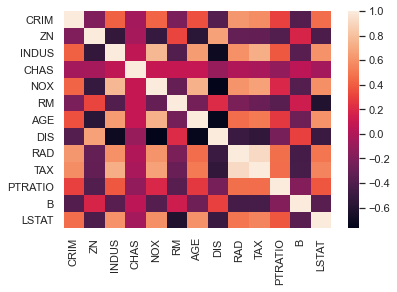

In [137]:
# seaborn es un paquete para facilitar la graficación avanzada
# aquí utilizamos un mapa de calor para visualizar la matriz de correlación
import seaborn as sns
sns.heatmap(correlation_matrix)

<AxesSubplot:>

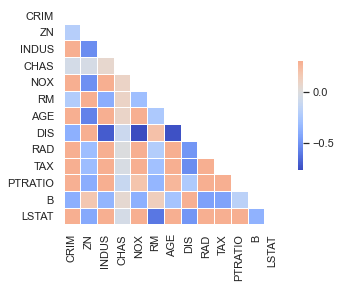

In [138]:
"""
En la documentación de Seaborn, puede encontrar más 'recetas'
para hacer gráficos visualmente más atractivos.
"""

sns.set_theme(style="white")
#numpy,triu devuelve una copia de un array con los elementos por debajo de la diagonal
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))
#color_map = sns.diverging_palette(230, 20, as_cmap=True)
color_map =mpl.cm.coolwarm
sns.heatmap(correlation_matrix, mask=mask, 
            cmap=color_map, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [172]:
"""
Buscaremos las variables con la menor correlación con cada una de las demás.
"""
threshold = 0.50

for col in variables:
    condition = [row for row in variables if row!=col]
    arr = correlation_matrix[[col]].loc[condition]
                             
    if np.all(np.abs(arr)<=threshold):
        print(col)

CHAS
PTRATIO
B


Estas variables son:
1. `CHAS`:  Variable ficticia de Charles River (= 1 si el tramo limita con el río; 0 en caso contrario)
2. `PTRATIO`: Proporción de alumnos por profesor por ciudad
3. `B`: $1000(Bk - 0.63)^2$ donde Bk es la proporción de afroamericanos por ciudad

In [173]:
"""
Buscaremos las variables con alta correlación con alguna otra variables.
"""

for col in variables:
    condition = [row for row in variables if row!=col]
    arr = correlation_matrix[col].loc[condition]
    high_corr = (np.abs(arr)>threshold).values
    if np.any(high_corr):
        print(col)
        #print(arr[np.abs(arr)>threshold])

CRIM
ZN
INDUS
NOX
RM
AGE
DIS
RAD
TAX
LSTAT


In [182]:
import graphviz
threshold = .70
f = graphviz.Graph()

for i in range(len(variables)):
    col = variables[i]
    f.node(col, label=col)

for i in range(len(variables)):
    for j in range(i+1, len(variables)):
        tail = variables[i]
        head = variables[j]
        #print(tail, head)
        c = correlation_matrix.iloc[i,j]
        if np.abs(c)>threshold:
            f.edge(tail, head, label=str(c))

f.view()

'Graph.gv.pdf'

Podemos detectar asociaciones más fuertes de forma automática calculando los eigenvectores de la matriz de correlación. 

In [142]:
# Calculamos los eigenvalores con sus eigenvectores asociados
corr = np.corrcoef(X, rowvar=False)
eigenvalues, eigenvectors = np.linalg.eig(corr)

In [143]:
# Buscamos el eigenvalor más cercano a cero
idx = np.argmin(np.abs(eigenvalues))
print(eigenvalues[idx])
print(idx)

0.06350926044147231
8


In [144]:
# Inspeccionamos el eigenvector asociado a este eigenvalor
v = eigenvectors[:,8]
print(v)

[-0.0459523   0.08091897  0.25107654 -0.03592171 -0.04363045 -0.0455671
  0.03855068  0.01829854  0.63348972 -0.72023345 -0.02339805  0.00446307
 -0.02443168]


In [145]:
mayor_contribucion = np.abs(v)>=0.5
print(mayor_contribucion)
v[mayor_contribucion]

[False False False False False False False False  True  True False False
 False]


array([ 0.63348972, -0.72023345])

In [146]:
idxs = np.where(mayor_contribucion)
print(variables[idxs])
print(idxs)

Index(['RAD', 'TAX'], dtype='object')
(array([8, 9], dtype=int64),)


Una vez encontrados los culpables de la multicolinealidad, ¿qué remedio podríamos utilizar para esas variables? *La eliminación de algunas de ellas suele ser la mejor solución.*

## Escalado de características 

Trabajar con diferentes características requiere más atención a la hora de estimar los coeficientes debido a sus similitudes, lo que puede provocar un aumento de la varianza de las estimaciones, como ya comentamos inicialmente.

Algunas características de sus datos pueden representarse con medidas en unidades, otras en decimales y otras en miles, dependiendo del aspecto de la realidad que represente cada característica. 

El remedio es muy fácil; sólo hay que poner todas las características en la misma escala. Esta operación se denomina escalado de características, que puede lograrse mediante estandarización o normalización. 

La normalización reescala todos los valores en el intervalo entre el cero y el uno (normalmente, pero también son posibles diferentes rangos), mientras que la estandarización opera eliminando la media y dividiendo por la desviación estándar para obtener una varianza unitaria.

In [147]:
linear_regression = linear_model.LinearRegression(
    normalize=False, 
    fit_intercept=True)

In [148]:
from sklearn.preprocessing import StandardScaler 
from sklearn.pipeline import make_pipeline 
standardization = StandardScaler()
Stand_coef_linear_reg = make_pipeline(
    standardization,
    linear_regression)

In [149]:
linear_regression.fit(X,y) 
for coef, var in sorted(
    zip(map(abs,linear_regression.coef_),
    dataset.columns[:-1]), reverse=True):
    print ("{:<10} {:.3f}".format(var, coef))

NOX        17.767
RM         3.810
CHAS       2.687
DIS        1.476
PTRATIO    0.953
LSTAT      0.525
RAD        0.306
CRIM       0.108
ZN         0.046
INDUS      0.021
TAX        0.012
B          0.009
AGE        0.001


In [150]:
Stand_coef_linear_reg.fit(X,y)
for coef, var in sorted(
    zip(
        map(abs,Stand_coef_linear_reg.steps[1][1].coef_), 
        dataset.columns[:-1]), reverse=True
    ):
    print ("{:<10} {:.3f}".format(var, coef))

LSTAT      3.744
DIS        3.104
RM         2.674
RAD        2.662
TAX        2.077
PTRATIO    2.061
NOX        2.057
ZN         1.082
CRIM       0.928
B          0.849
CHAS       0.682
INDUS      0.141
AGE        0.019


Al tener ahora todos los predictores en una escala similar, podemos ofrecer fácilmente una interpretación más realista de cada coeficiente.

## Comparación de modelos 

Desde un punto de vista general, podemos evaluar un modelo comparando lo mejor que hace con respecto a una media simple, por ejemplo el coeficiente de determinación, R-cuadrado.

In [151]:
"""
Tenemos que registrar primero cuál es el R-cuadrado cuando construimos el modelo con todas 
las variables presentes. Podemos denominar dicho valor como nuestra base de comparación:
"""

def r2_est(x, y, lr):
    return r2_score(y, lr.fit(x,y).predict(x))

print ('Base R2: {:0.3f}'.format(r2_est(X,y,Stand_coef_linear_reg)))

Base R2: 0.741


Después, solo hay que eliminar una variable cada vez del conjunto de predictores, estimar de nuevo el modelo de regresión registrando su coeficiente de determinación, y restarlo del valor de referencia que obtuvimos del modelo de regresión completo:

In [152]:
r2_impact = list()
for j in range(X.shape[1]):
    other_variables = [i for i in range(X.shape[1]) if i!=j]
    r2_impact.append(
        ((r2_est(X,y,Stand_coef_linear_reg) - r2_est(X.values [:,other_variables],
        y,Stand_coef_linear_reg)),
         dataset.columns[j]))
for imp, varname in sorted(r2_impact, reverse=True):
    print ("{:<10} {:.3f}".format(varname, imp))

LSTAT      0.056
RM         0.044
DIS        0.029
PTRATIO    0.028
NOX        0.011
RAD        0.011
B          0.006
ZN         0.006
CRIM       0.006
TAX        0.006
CHAS       0.005
INDUS      0.000
AGE        0.000


Después de obtener todas las diferencias, cada una de las cuales representa la contribución de cada variable a al R-cuadrado, sólo tenemos que clasificarlas y entonces tendremos una idea de qué variables contribuyen más a reducir el error del modelo lineal; este es un punto de vista diferente de saber qué variable ha contribuido más al valor de la respuesta. Dicha contribución se denomina **R-cuadrado parcial.**

## Modelos de interacción

Habiendo explicado cómo construir un modelo de regresión con múltiples variables y habiendo tocado el tema de su utilización e interpretación, partimos de este párrafo para explorar cómo mejorarlo. Como primer paso, trabajaremos en su ajuste con los datos actuales.

Una de las primeras fuentes de no linealidad se debe a las posibles interacciones entre predictores. Dos predictores interactúan cuando el efecto de uno de ellos sobre la variable de respuesta varía con respecto a los valores de los otros predictores. respecto a los valores de los otros predictores.

Matemáticamente, los términos de interacción se modelan multiplicándose entre sí para que nuestro modelo lineal capte la información complementaria de su relación, como se expresa en este ejemplo de un modelo con dos predictores que interactúan:

$$ y = \beta_0 + \beta_1 x_1 + \beta_2 x_2 + \beta_{12} x_1 x_2 $$

La mejor manera de ilustrar el enfoque de búsqueda automática es mostrar un ejemplo en Python utilizando PolynomialFeatures de Scikit-learn, una función que permite tanto interacciones como expansiones de polinomios (vamos a hablar de ellas en el siguiente párrafo):

In [153]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import r2_score
linear_regression = linear_model.LinearRegression(normalize=False, fit_intercept=True)
create_interactions = PolynomialFeatures(degree=2,
                                         interaction_only=True, 
                                         include_bias=False)

In [154]:
baseline = r2_est(X,y, linear_regression)
Xi = create_interactions.fit_transform(X)
main_effects = create_interactions.n_input_features_
print(main_effects)

13


In [155]:
for k,effect in enumerate(create_interactions.powers_[main_effects:]):
    termA, termB = variables[effect==1]
    increment = r2_est(Xi[:,list(range(main_effects)) + [main_effects+k]],y,linear_regression) - baseline
    if increment > 0.01:
        #print ('Adding interaction %8s *%8s R2: %5.3f' % (termA, termB, increment))
        print("{:>8}*{:<8} -> R2: {:.3f}".format(termA, termB, increment))

    CRIM*CHAS     -> R2: 0.011
    CRIM*RM       -> R2: 0.021
      ZN*RM       -> R2: 0.013
   INDUS*RM       -> R2: 0.038
   INDUS*DIS      -> R2: 0.013
     NOX*RM       -> R2: 0.027
      RM*AGE      -> R2: 0.024
      RM*DIS      -> R2: 0.018
      RM*RAD      -> R2: 0.049
      RM*TAX      -> R2: 0.054
      RM*PTRATIO  -> R2: 0.041
      RM*B        -> R2: 0.020
      RM*LSTAT    -> R2: 0.064


Los efectos de interacción relevantes están claramente constituidos por la variable "RM" (una de las más importante, como se ha visto antes) y la mejora más fuerte viene dada por su interacción con otra característica clave, LSTAT.

In [156]:
Xi = X
Xi['interaction'] = X['RM']*X['LSTAT']
print ('R2 of a model with RM*LSTAT interaction: %0.3f' % r2_est(Xi,y, linear_regression))

R2 of a model with RM*LSTAT interaction: 0.805


## Comparando una transformación lineal con una cúbica

Al desactivar el parámetro `interaction_only` en la función `PolynomialFeatures`, podemos obtener la transformación polinómica completa de nuestra matriz de entrada, y no sólo las interacciones:

In [157]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

In [158]:
linear_regression = linear_model.LinearRegression(normalize=False, fit_intercept=True)
create_cubic = PolynomialFeatures(degree=3, interaction_only=False, include_bias=False)
create_quadratic = PolynomialFeatures(degree=2, interaction_only=False, include_bias=False)

In [159]:
linear_predictor = make_pipeline(linear_regression)
quadratic_predictor = make_pipeline(create_quadratic, linear_regression)
cubic_predictor = make_pipeline(create_cubic, linear_regression)

In [160]:
predictor = 'LSTAT'
x = dataset['LSTAT'].values.reshape((observations,1))
xt = np.arange(0,50,0.1).reshape((500,1))
x_range = [dataset[predictor].min(),dataset[predictor].max()]
y_range = [dataset['target'].min(),dataset['target'].max()]

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


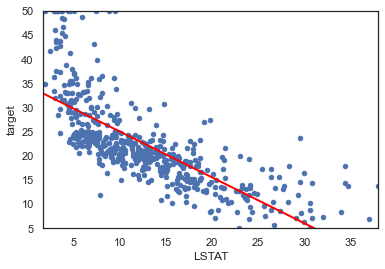

In [161]:
scatter = dataset.plot(kind='scatter', x=predictor, y='target', xlim=x_range, ylim=y_range)
regr_line = scatter.plot(xt, 
                         linear_predictor.fit(x,y).predict(xt), 
                         '-', color='red', linewidth=2)

In [162]:
for d in [1,2,3,5,15]:
    create_poly = PolynomialFeatures(degree=d,
                                     interaction_only=False,
                                     include_bias=False)
    poly = make_pipeline(create_poly, StandardScaler(), linear_regression)
    model = poly.fit(x,y)
    print ("grado {:<2} -> R2={:0.3f}".format(d,r2_score(y,model.predict(x))))

grado 1  -> R2=0.544
grado 2  -> R2=0.641
grado 3  -> R2=0.658
grado 5  -> R2=0.682
grado 15 -> R2=0.695


## Resumen

En este capítulo, hemos seguido introduciendo la regresión lineal, ampliando nuestro ejemplo de uno simple a uno múltiple. Hemos revisado los resultados anteriores de las funciones lineales de Statsmodels (el enfoque estadístico clásico).


Empezamos a experimentar con modelos eliminando predictores seleccionados y evaluando el impacto de este movimiento desde el punto de vista de la medida R-cuadrado. 

Mientras tanto, también descubrimos las correlaciones recíprocas entre los predictores y cómo hacer más lineales las relaciones entre cada predictor y la variable objetivo interceptando las interacciones y mediante la expansión polinómica de las características.

*¡Gracias por su participación!*